In [1]:
from pathlib import Path 
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 

from panspace.utils import LogInfo
log_info = LogInfo()

DIR_LOGS = Path("/home/avila/Servers/watson/data/output-fcgr-full/logs")
DIR_LOGS = Path("/home/avila/Servers/watson/logs-fcgr-maks-benchmark/logs-masks")
DIR_LOGS = Path("/home/avila/Servers/watson/logs-fcgr-maks-benchmark/logs-8mer")
list_logs = list(DIR_LOGS.glob("*log"))

In [2]:
def get_df_logs(dir_logs):
    
    list_logs = list(Path(dir_logs).glob("*log"))
    info = []
    for log in list_logs:
        d = log_info(log)
        d["id_log"] = log.stem

        info.append(d)

    df = pd.DataFrame(info)
    df["rule"] = df["id_log"].apply(lambda x: x.split("-")[0])
    df.dropna(inplace=True)

    return df

In [3]:
df_8mer = get_df_logs("/home/avila/Servers/watson/logs-fcgr-maks-benchmark/logs-8mer")
df_8mer.query("rule == 'count_kmers'").describe()

,User time (seconds),System time (seconds),Maximum resident set size (kbytes)
count,14453.000000,14453.000000,14453.000000
mean,0.124748,0.029300,29666.127171
std,0.139862,0.012999,3059.628245
min,0.050000,0.000000,25088.000000
25%,0.100000,0.020000,28160.000000
50%,0.110000,0.030000,29184.000000
75%,0.140000,0.030000,30208.000000
max,4.610000,0.350000,66316.000000


In [4]:
df_8mer.query("rule == 'fcgr'").describe()

,User time (seconds),System time (seconds),Maximum resident set size (kbytes)
count,5.00000,5.000000,5.000000
mean,6.60000,1.772000,26257.600000
std,3.36911,0.897536,204.833591
min,0.61000,0.170000,26164.000000
25%,7.79000,2.100000,26164.000000
50%,7.88000,2.140000,26168.000000
75%,7.99000,2.190000,26168.000000
max,8.73000,2.260000,26624.000000


In [5]:
df_masks = get_df_logs("/home/avila/Servers/watson/logs-fcgr-maks-benchmark/logs-masks")
df_masks.query("rule == 'count_kmers'").describe()

,User time (seconds),System time (seconds),Maximum resident set size (kbytes)
count,14453.000000,14453.000000,14453.000000
mean,2.752679,0.309669,50788.779077
std,0.386800,0.037675,4819.050216
min,2.100000,0.190000,38400.000000
25%,2.530000,0.280000,47620.000000
50%,2.680000,0.310000,51460.000000
75%,2.890000,0.340000,53676.000000
max,6.650000,0.440000,81984.000000


In [6]:
df_masks.query("rule == 'fcgr'").describe()

,User time (seconds),System time (seconds),Maximum resident set size (kbytes)
count,20.000000,20.000000,20.000000
mean,604.613500,79.825000,49788.200000
std,306.554589,41.462284,7264.368583
min,79.080000,10.320000,37456.000000
25%,448.480000,57.145000,46285.000000
50%,772.315000,96.060000,52868.000000
75%,830.785000,113.087500,53934.000000
max,909.110000,131.820000,58688.000000


In [7]:
df = pd.concat([ 
    df_8mer.query("rule == 'count_kmers'").describe()["User time (seconds)"],
    df_8mer.query("rule == 'fcgr'").describe()["User time (seconds)"],
    df_masks.query("rule == 'count_kmers'").describe()["User time (seconds)"],
    df_masks.query("rule == 'fcgr'").describe()["User time (seconds)"],
], axis=1)
df.columns = ["8mers-counts_kmers","8mers-fcgr","15mers-counts_kmers","15mers-fcgr"]
df

,8mers-counts_kmers,8mers-fcgr,15mers-counts_kmers,15mers-fcgr
count,14453.000000,5.00000,14453.000000,20.000000
mean,0.124748,6.60000,2.752679,604.613500
std,0.139862,3.36911,0.386800,306.554589
min,0.050000,0.61000,2.100000,79.080000
25%,0.100000,7.79000,2.530000,448.480000
50%,0.110000,7.88000,2.680000,772.315000
75%,0.140000,7.99000,2.890000,830.785000
max,4.610000,8.73000,6.650000,909.110000


In [8]:
(1_900_000 * 2.752679 + 20*604 ) / 3600 / 24 

60.6732650462963

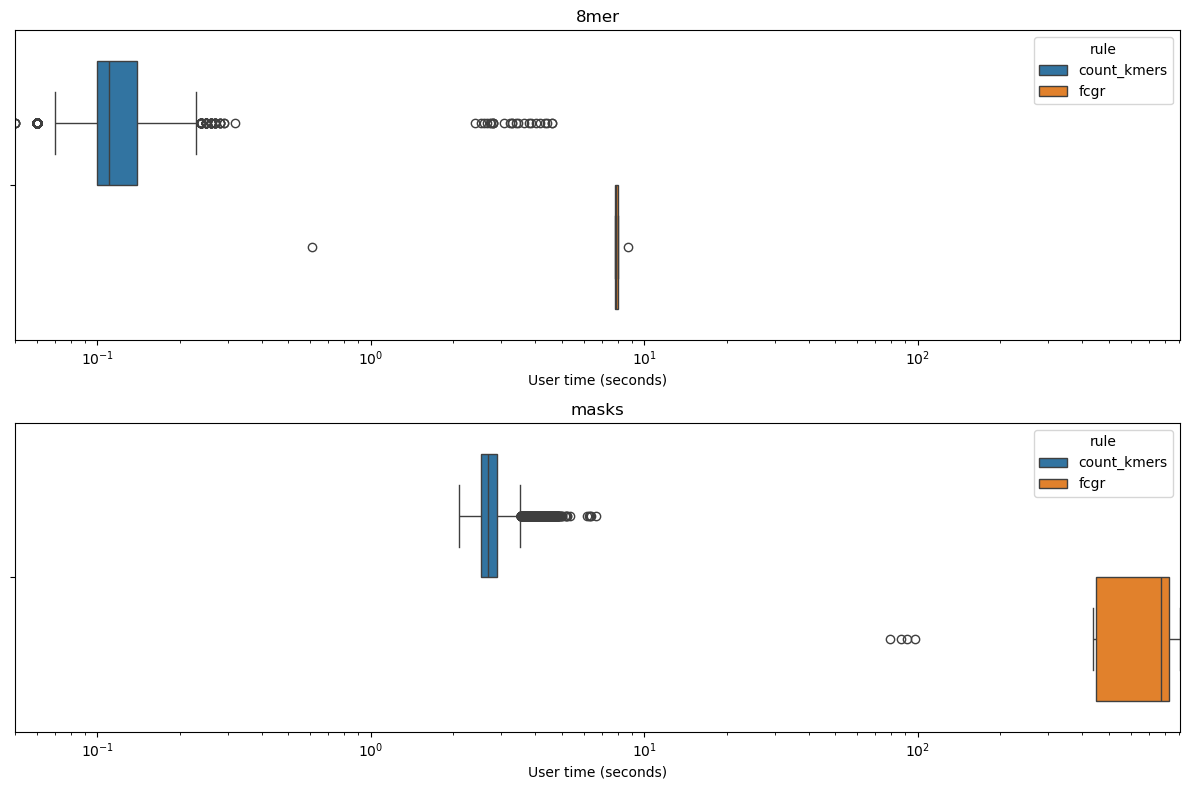

In [9]:
fig, ax = plt.subplots(2,1,figsize=(12,8))
sns.boxplot(data=df_8mer, x="User time (seconds)", hue="rule", ax=ax[0], log_scale=True)
ax[0].set_title("8mer")

sns.boxplot(data=df_masks, x="User time (seconds)", hue="rule",ax=ax[1], log_scale=True)
ax[1].set_title("masks")
plt.tight_layout()

# Set the same x-axis limits for both plots
xmin = min(df_8mer["User time (seconds)"].min(), df_masks["User time (seconds)"].min())
xmax = max(df_8mer["User time (seconds)"].max(), df_masks["User time (seconds)"].max())
for a in ax:
    a.set_xlim(xmin, xmax)

In [11]:
df_15mer = get_df_logs("/home/avila/Servers/watson/logs-fcgr-maks-benchmark/logs-15mer")
df_15mer

,User time (seconds),System time (seconds),Maximum resident set size (kbytes),id_log,rule
0,2.29,0.21,54100.0,count_kmers-mycobacterium_tuberculosis__01-SAM...,count_kmers
1,2.12,0.30,42120.0,count_kmers-streptococcus_pneumoniae__01-SAMEA...,count_kmers
2,2.54,0.35,53768.0,count_kmers-salmonella_enterica__01-SAMEA788929,count_kmers
3,2.33,0.33,48100.0,count_kmers-mycobacterium_tuberculosis__01-SAM...,count_kmers
4,2.05,0.23,43236.0,count_kmers-streptococcus_pneumoniae__01-SAMEA...,count_kmers
...,...,...,...,...,...
14456,2.30,0.27,63992.0,count_kmers-mycobacterium_tuberculosis__01-SAM...,count_kmers
14457,2.31,0.27,51808.0,count_kmers-mycobacterium_tuberculosis__01-SAM...,count_kmers
14458,2.42,0.30,54436.0,count_kmers-salmonella_enterica__01-SAMEA773596,count_kmers
14459,2.17,0.26,43064.0,count_kmers-streptococcus_pneumoniae__01-SAMEA...,count_kmers


In [14]:
df_8mer.query("rule == 'fcgr'")

,User time (seconds),System time (seconds),Maximum resident set size (kbytes),id_log,rule
4923,0.61,0.17,26168.0,fcgr-achromobacter_xylosoxidans__01_11111111,fcgr
5446,7.79,2.10,26624.0,fcgr-acinetobacter_baumannii__01_11111111,fcgr
6727,8.73,2.19,26164.0,fcgr-mycobacterium_tuberculosis__01_11111111,fcgr
10893,7.88,2.14,26164.0,fcgr-salmonella_enterica__01_11111111,fcgr
10923,7.99,2.26,26168.0,fcgr-streptococcus_pneumoniae__01_11111111,fcgr


In [12]:
df_15mer.query("rule == 'fcgr'")

,User time (seconds),System time (seconds),Maximum resident set size (kbytes),id_log,rule
7861,848.09,1303.03,12639244.0,fcgr-achromobacter_xylosoxidans__01_1111111111...,fcgr
9555,702.09,1628.37,12618116.0,fcgr-streptococcus_pneumoniae__01_111111111111111,fcgr
11003,819.85,2133.22,12627804.0,fcgr-acinetobacter_baumannii__01_111111111111111,fcgr
12114,384.19,924.30,12628556.0,fcgr-mycobacterium_tuberculosis__01_1111111111...,fcgr


In [16]:
df_masks.query("rule=='fcgr'")

,User time (seconds),System time (seconds),Maximum resident set size (kbytes),id_log,rule
228,883.41,119.79,52456.0,fcgr-salmonella_enterica__01_111100000001111,fcgr
790,773.69,104.93,46936.0,fcgr-acinetobacter_baumannii__01_111100000001111,fcgr
911,809.70,97.55,53092.0,fcgr-mycobacterium_tuberculosis__01_1111000110...,fcgr
1436,97.45,10.32,58688.0,fcgr-achromobacter_xylosoxidans__01_1111000110...,fcgr
2265,769.26,131.82,54144.0,fcgr-mycobacterium_tuberculosis__01_1111000110...,fcgr
3051,438.58,64.39,37972.0,fcgr-streptococcus_pneumoniae__01_111100000001111,fcgr
5013,770.94,114.07,46644.0,fcgr-acinetobacter_baumannii__01_111100011000011,fcgr
5228,79.08,11.12,57668.0,fcgr-achromobacter_xylosoxidans__01_1110001010...,fcgr
6350,455.09,57.73,37852.0,fcgr-streptococcus_pneumoniae__01_111100011000011,fcgr
6438,909.11,111.09,52644.0,fcgr-salmonella_enterica__01_111100011000011,fcgr


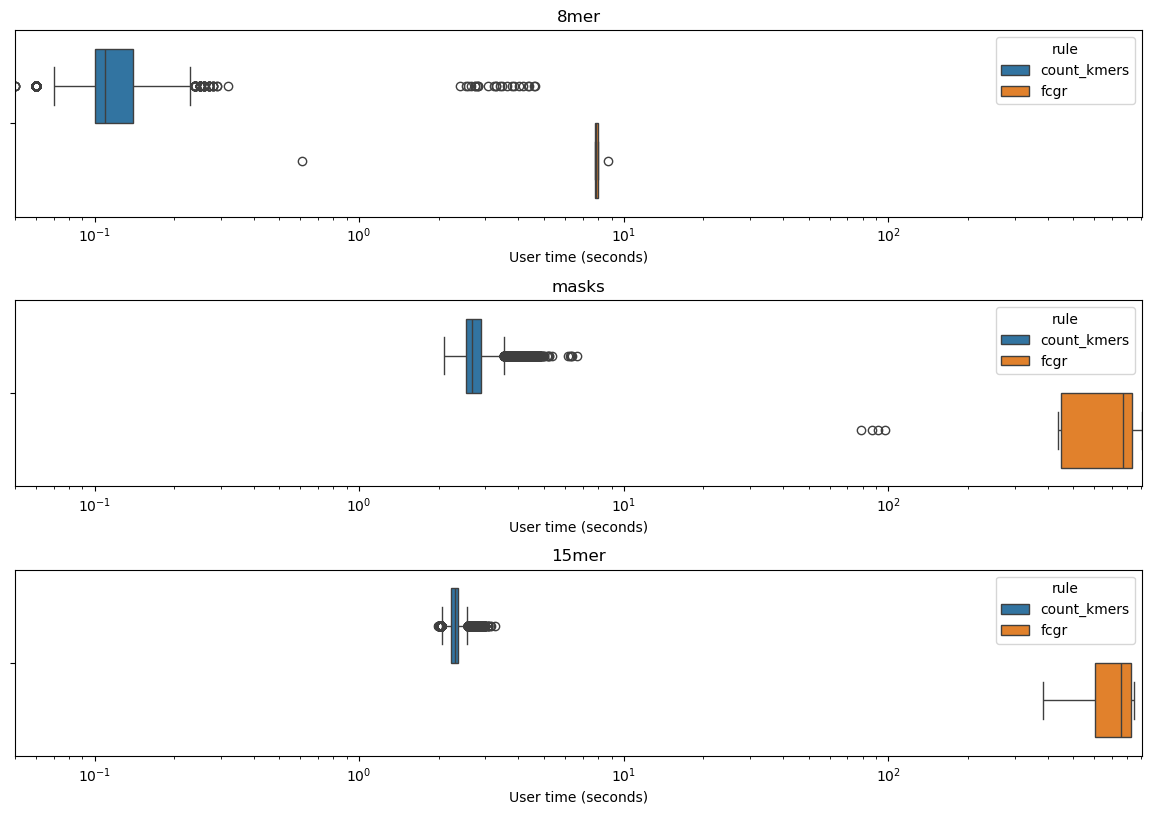

In [18]:
fig, ax = plt.subplots(3,1,figsize=(12,8))
sns.boxplot(data=df_8mer, x="User time (seconds)", hue="rule", ax=ax[0], log_scale=True)
ax[0].set_title("8mer")

sns.boxplot(data=df_masks, x="User time (seconds)", hue="rule",ax=ax[1], log_scale=True)
ax[1].set_title("masks")
plt.tight_layout()

sns.boxplot(data=df_15mer, x="User time (seconds)", hue="rule", ax=ax[2], log_scale=True)
ax[2].set_title("15mer")


# Set the same x-axis limits for both plots
xmin = min(df_8mer["User time (seconds)"].min(), df_masks["User time (seconds)"].min(), df_15mer["User time (seconds)"].min())
xmax = max(df_8mer["User time (seconds)"].max(), df_masks["User time (seconds)"].max(), df_15mer["User time (seconds)"].max())
for a in ax:
    a.set_xlim(xmin, xmax)